<a href="https://colab.research.google.com/github/AMO-35/HCV_Prediction_With_Self_Training_Model/blob/main/HCV_Prediction(With_Self_Training_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import All essential Library**

In [ ]:
#This imports the NumPy library, which provides support for efficient numerical computations in Python.

import numpy as np

#This imports the Pandas library, which provides data structures and data analysis tools for handling and manipulating data.

import pandas as pd

#This imports the pyplot module from the Matplotlib library, which provides a MATLAB-like interface for creating visualizations.

import matplotlib.pyplot as plt

#This imports the Seaborn library, which is built on top of Matplotlib and provides additional statistical plotting capabilities and aesthetic enhancements.

import seaborn as sns

#This imports the style module from the Matplotlib library, which allows you to set the style for your visualizations.

from matplotlib import style

#This imports the SimpleImputer class from the scikit-learn library, which provides methods for imputing missing values in a dataset.

from sklearn.impute import SimpleImputer


#This imports the train_test_split function and the GridSearchCV class from the scikit-learn library.
#The train_test_split function is used to split data into training and testing sets, while the GridSearchCV class is used for hyperparameter tuning using cross-validation

from sklearn.model_selection import train_test_split, GridSearchCV

#This imports the LogisticRegression class from the scikit-learn library
#which is a linear classification algorithm used for binary and multiclass classification problems.

from sklearn.linear_model import LogisticRegression

#This imports the RandomForestClassifier and GradientBoostingClassifier classes from the scikit-learn library, which are ensemble methods used for classification tasks.

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Cleaning And Pre-Processing**

**Read DataSet**

In [ ]:
# Read in data into a dataframe
data = pd.read_csv('/content/drive/MyDrive/HCV Prediction With Modelling/hcvdat0.csv')

# Display top of dataframe
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
## print shape of dataset with rows and columns
print(data.shape)

(615, 14)


Check DataTypes and Nan

In [ ]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


Covert Datatypes to Float

In [ ]:
# Replace all occurrences of Not Available with numpy not a number
data = data.replace({'Not Available': np.nan})

# Iterate through the columns
for col in list(data.columns):
    # Select columns that should be numeric
    if ( 'Unnamed: 0' in col or 'Age' in col  ):
        # Convert the data type to float
        data[col] = data[col].astype(float)

In [ ]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    float64
 1   Category    615 non-null    object 
 2   Age         615 non-null    float64
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(12), object(2)
memory usage: 67.4+ KB


Category column to Numeric Conversion

In [ ]:
# Replace category column to numeric
data['Category']= data['Category'].replace({'0=Blood Donor': 0, '0s=suspect Blood Donor': 4, '1=Hepatitis':1, '2=Fibrosis':2, '3=Cirrhosis': 3})

# Replace sex column to numeric

data['Sex'] = data['Sex'].replace({'m': 0, 'f': 1})

print(data)

     Unnamed: 0  Category   Age  Sex   ALB    ALP    ALT    AST   BIL    CHE  \
0           1.0         0  32.0    0  38.5   52.5    7.7   22.1   7.5   6.93   
1           2.0         0  32.0    0  38.5   70.3   18.0   24.7   3.9  11.17   
2           3.0         0  32.0    0  46.9   74.7   36.2   52.6   6.1   8.84   
3           4.0         0  32.0    0  43.2   52.0   30.6   22.6  18.9   7.33   
4           5.0         0  32.0    0  39.2   74.1   32.6   24.8   9.6   9.15   
..          ...       ...   ...  ...   ...    ...    ...    ...   ...    ...   
610       611.0         3  62.0    1  32.0  416.6    5.9  110.3  50.0   5.57   
611       612.0         3  64.0    1  24.0  102.8    2.9   44.4  20.0   1.54   
612       613.0         3  64.0    1  29.0   87.3    3.5   99.0  48.0   1.66   
613       614.0         3  46.0    1  33.0    NaN   39.0   62.0  20.0   3.56   
614       615.0         3  59.0    1  36.0    NaN  100.0   80.0  12.0   9.07   

     CHOL   CREA    GGT  PROT  
0    3.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    float64
 1   Category    615 non-null    int64  
 2   Age         615 non-null    float64
 3   Sex         615 non-null    int64  
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 67.4 KB


In [ ]:
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1.0,0,32.0,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2.0,0,32.0,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3.0,0,32.0,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4.0,0,32.0,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5.0,0,32.0,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611.0,3,62.0,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612.0,3,64.0,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613.0,3,64.0,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614.0,3,46.0,1,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


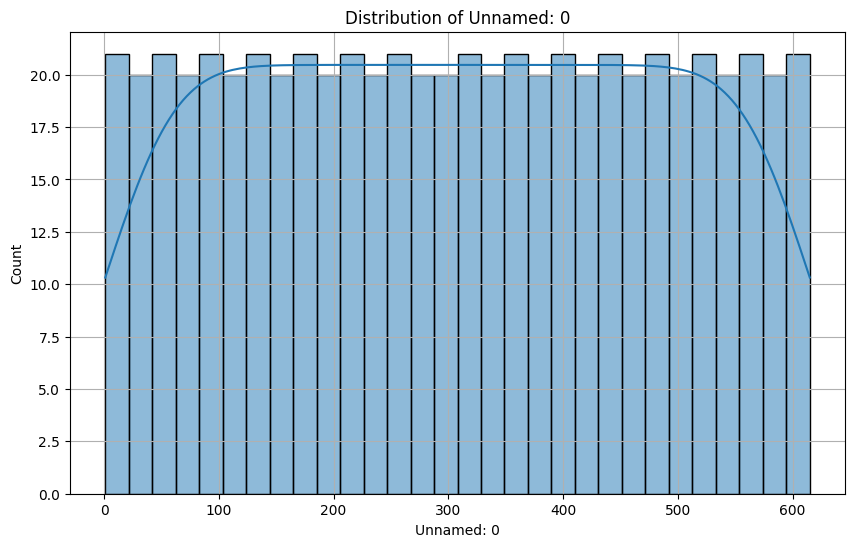

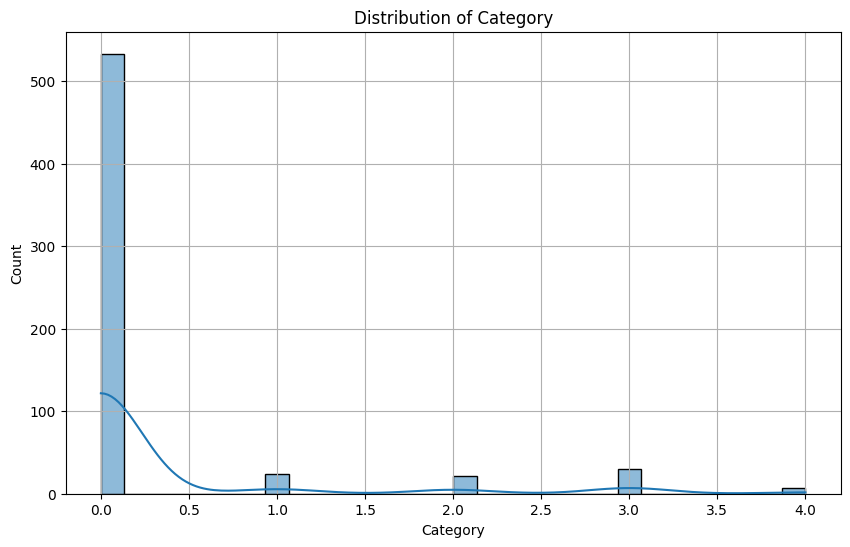

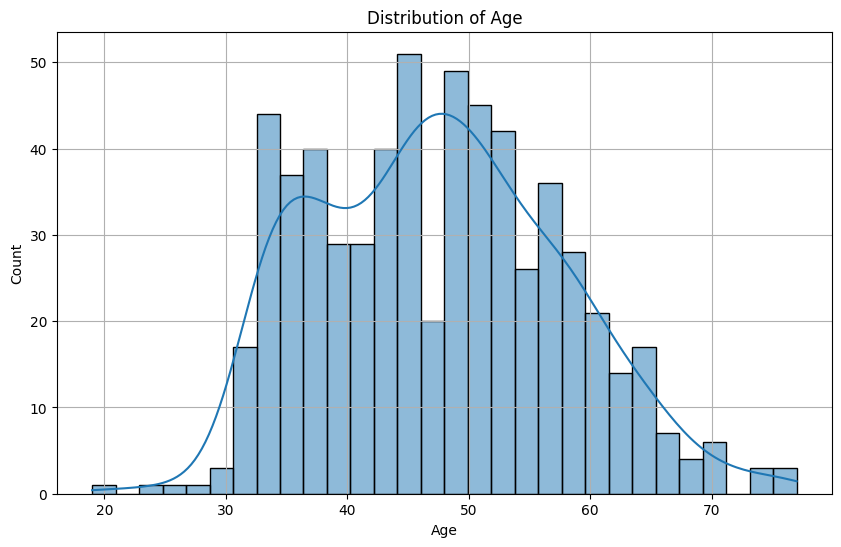

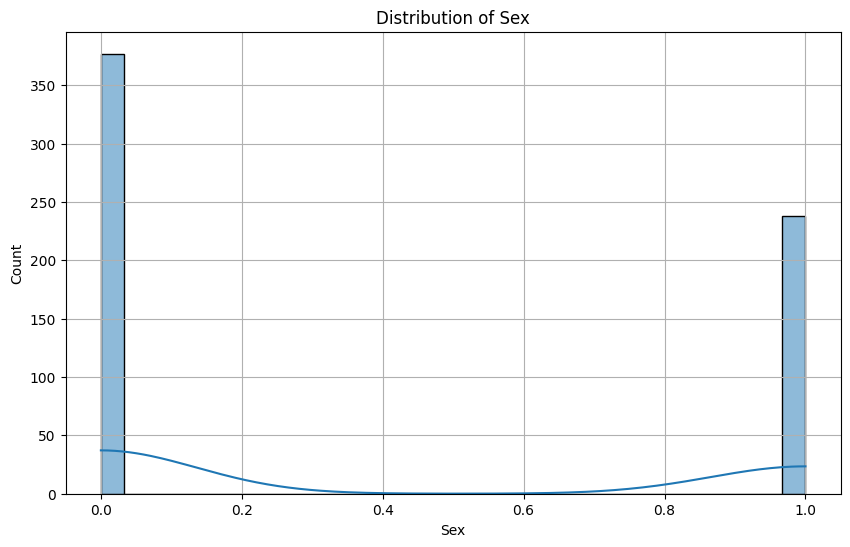

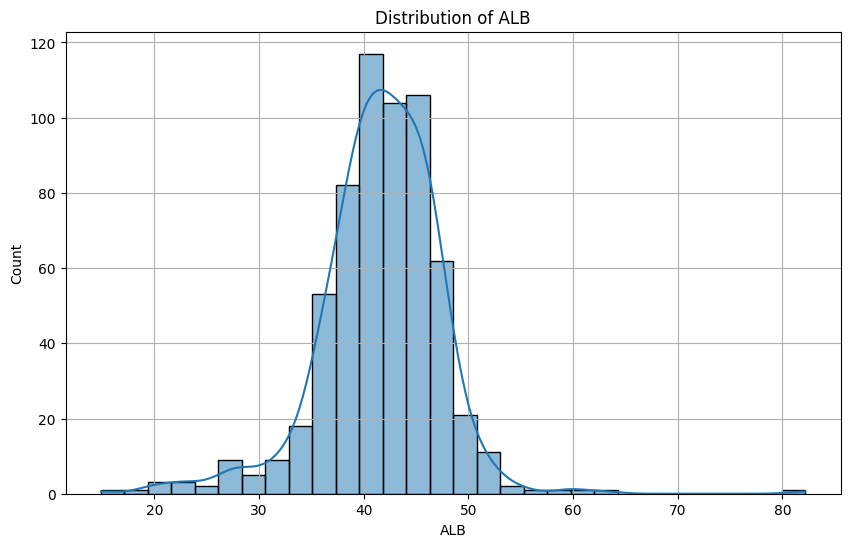

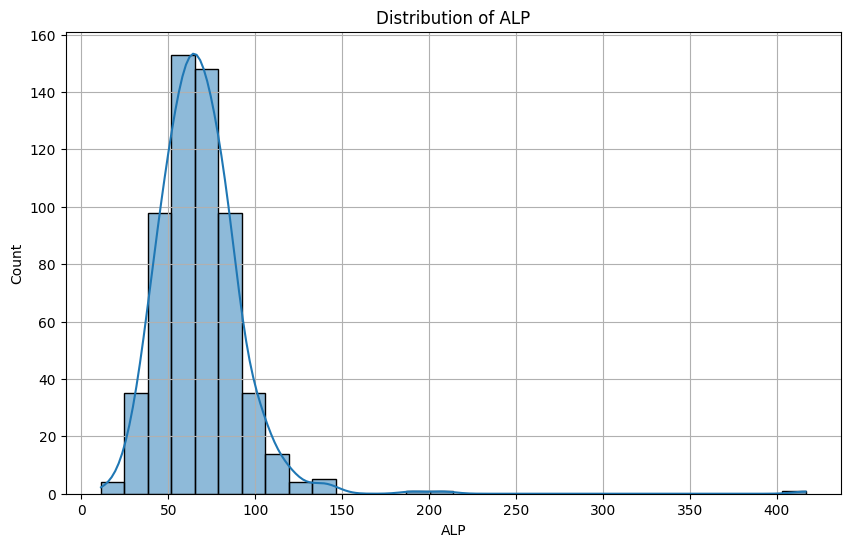

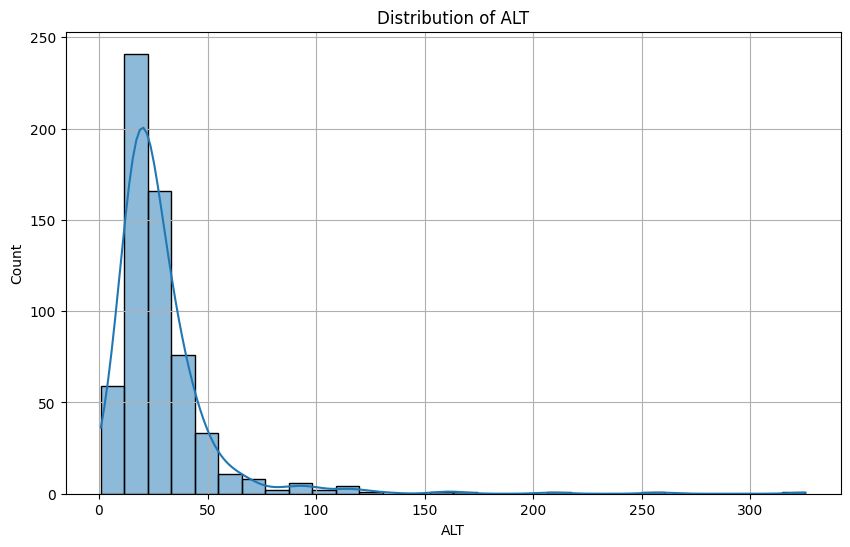

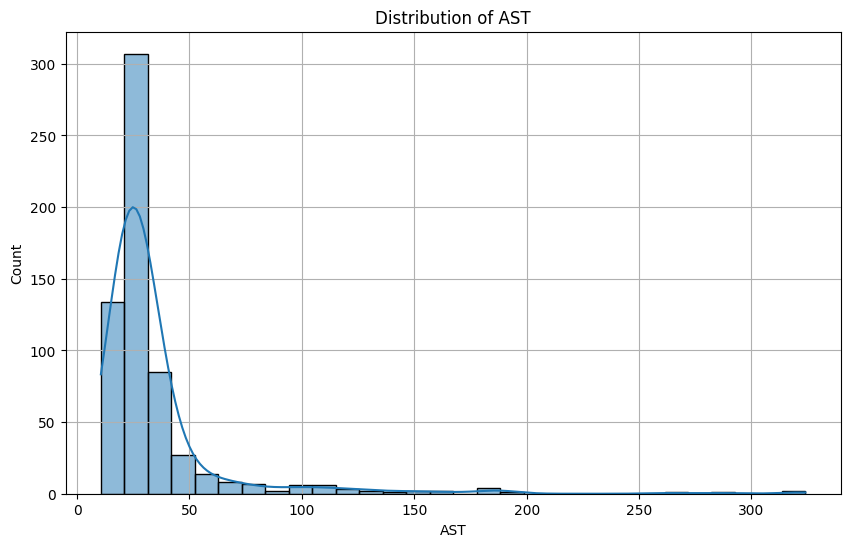

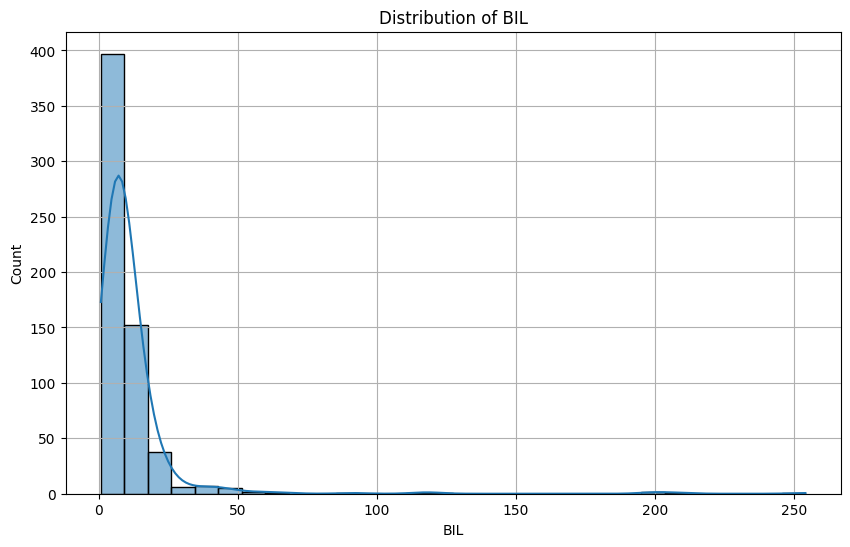

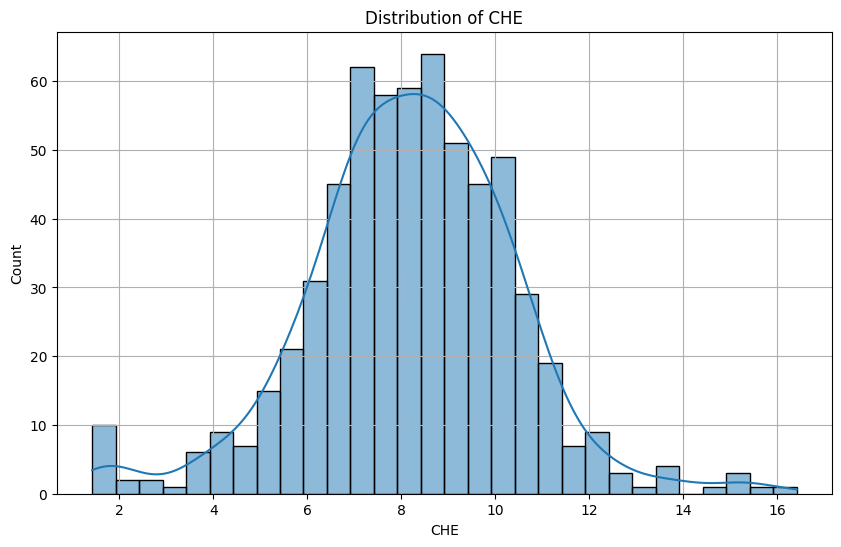

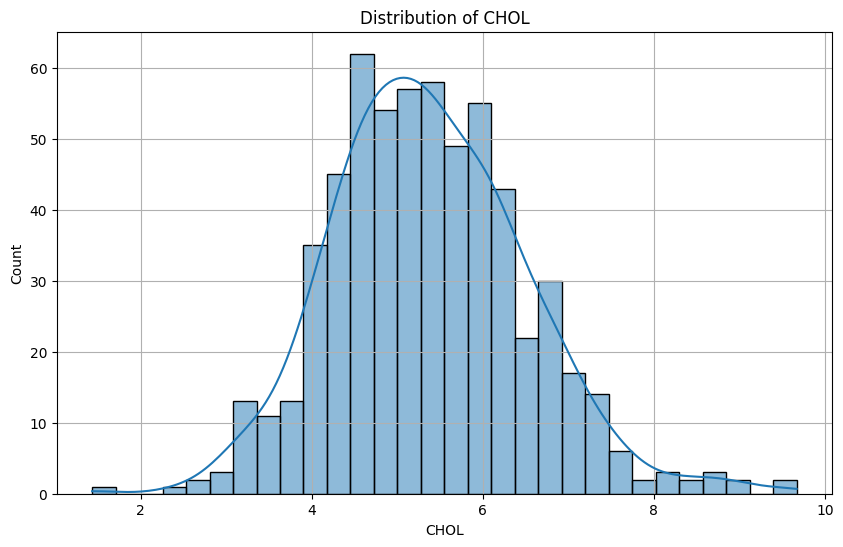

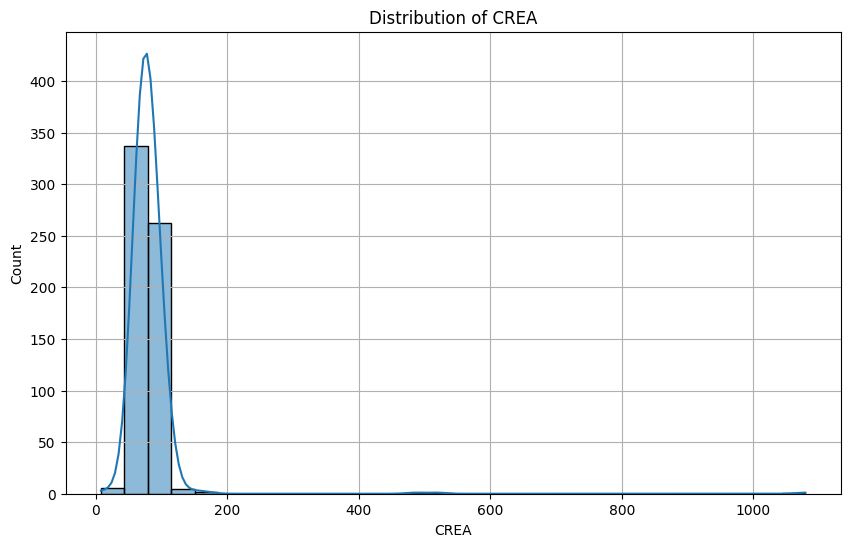

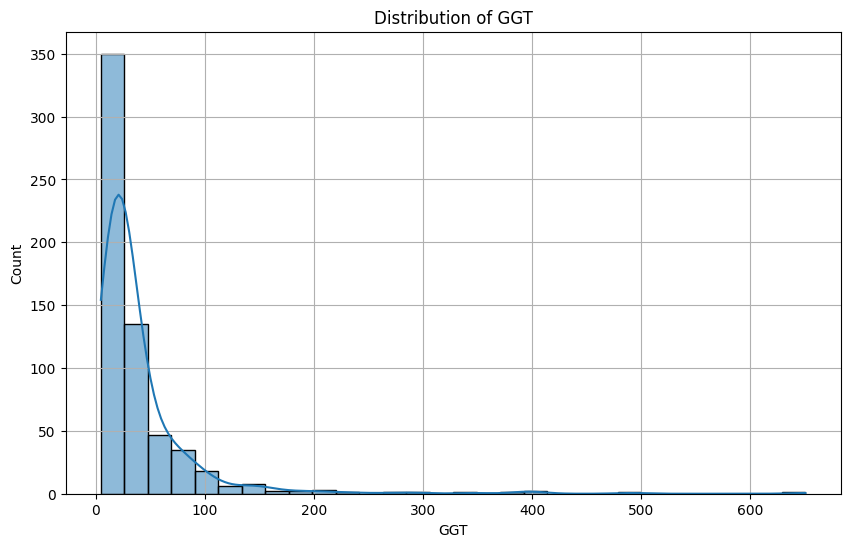

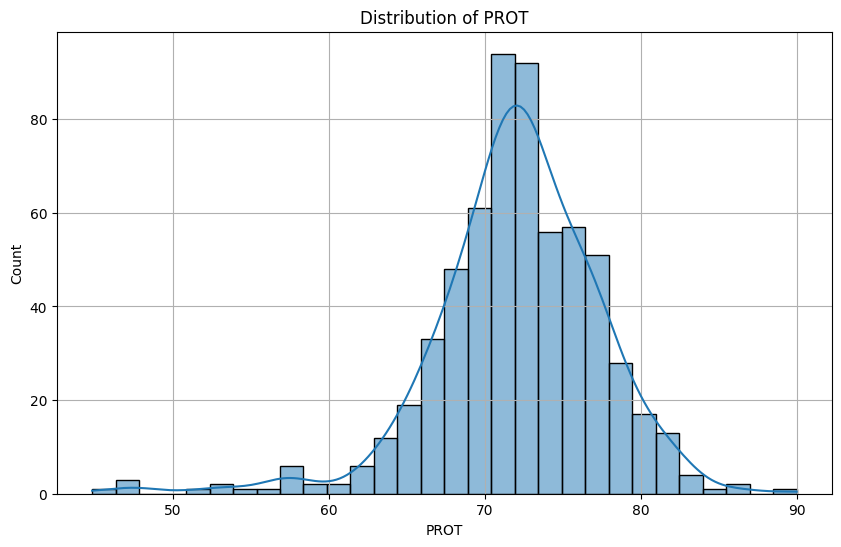

In [ ]:
import seaborn as sns

for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(10,6))
        sns.histplot(data[column], bins=30, kde=True)  # kde=True adds a Kernel Density Estimation plot
        plt.title(f'Distribution of {column}')
        plt.grid(True)
        plt.show()

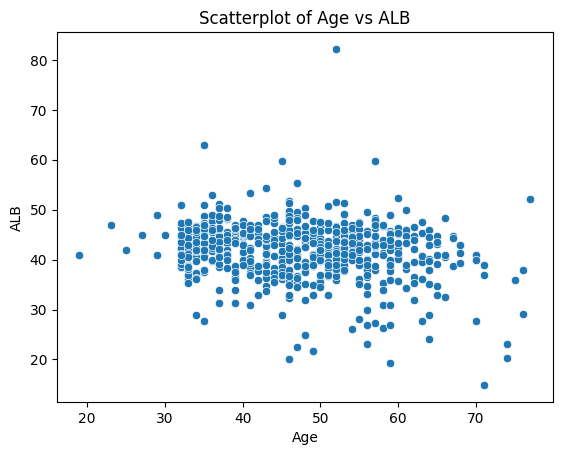

In [ ]:
sns.scatterplot(data=data, x='Age', y='ALB')
plt.title('Scatterplot of Age vs ALB')
plt.show()

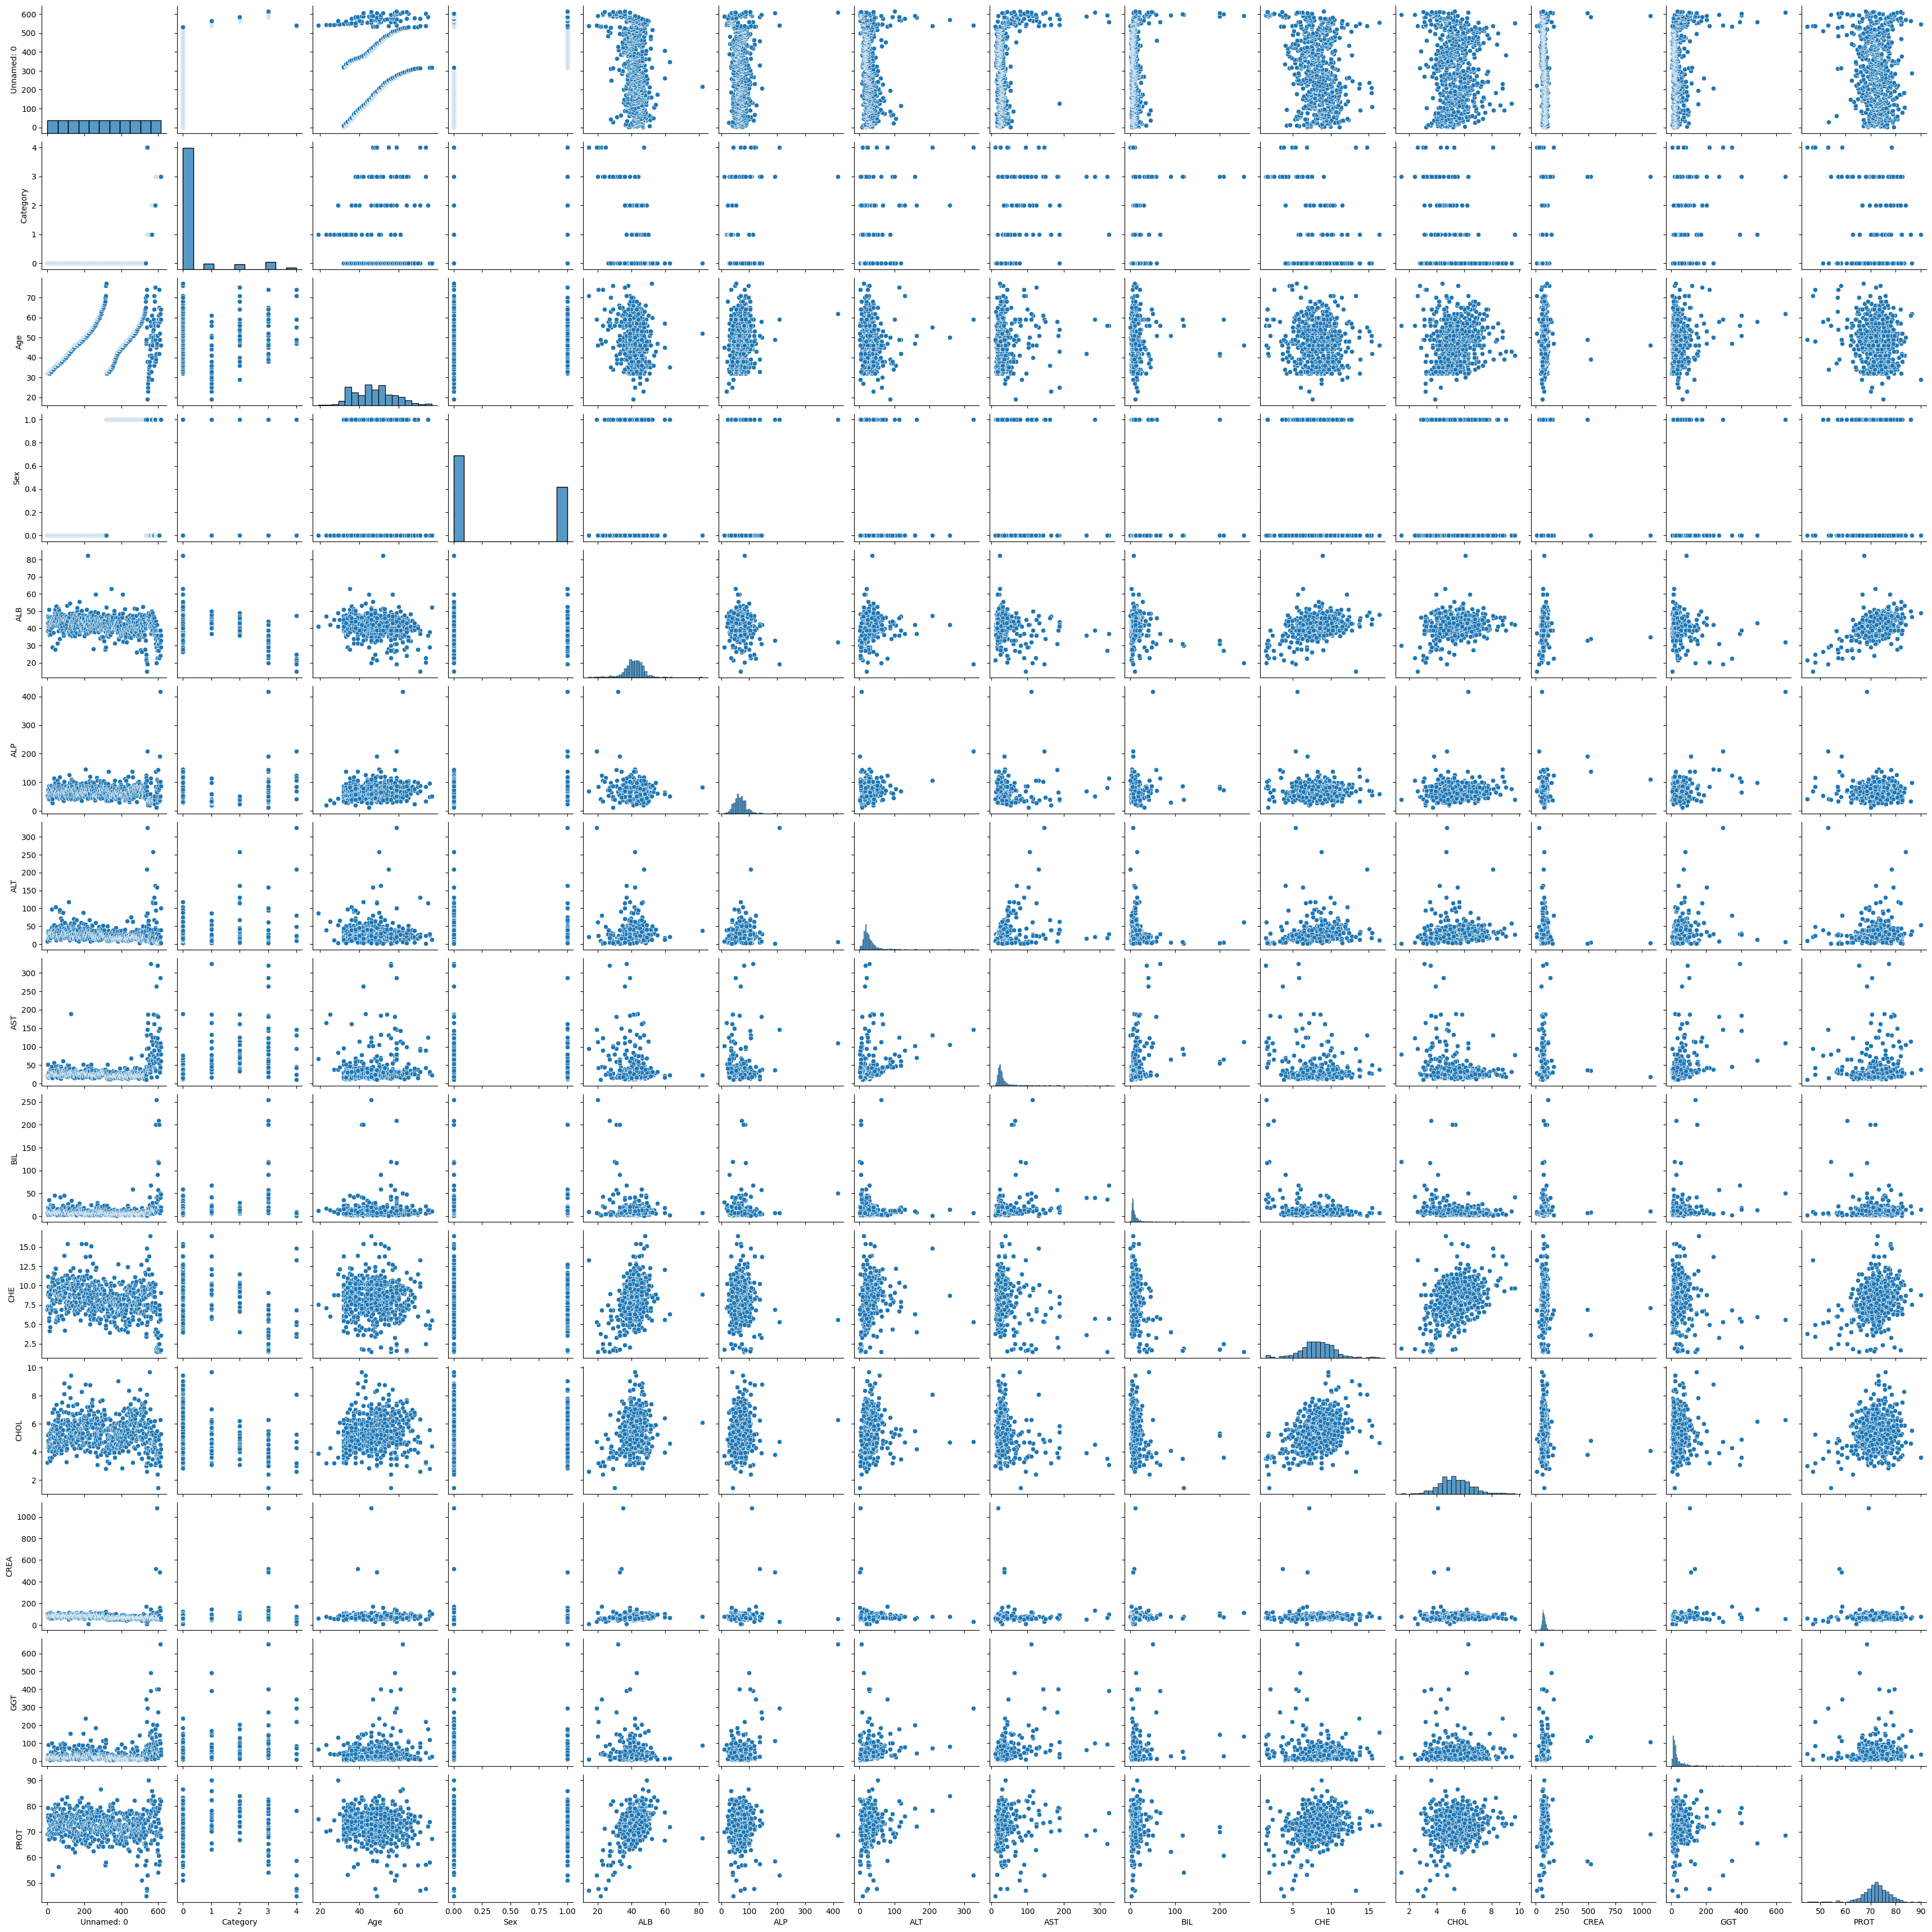

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize pairwise relationships
sns.pairplot(data)
plt.show()

In [ ]:
# Value counts of categorical variables
print(data['Category'].value_counts())
print(data['Sex'].value_counts())

0    533
3     30
1     24
2     21
4      7
Name: Category, dtype: int64
0    377
1    238
Name: Sex, dtype: int64


# **Convert Categorical datatypes to float**

In [ ]:
# Iterate through the columns
for col in list(data.columns):
    # Select columns that should be numeric
    if ( 'Category' in col or 'Sex' in col  ):
        # Convert the data type to float
        data[col] = data[col].astype(float)

In [ ]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    float64
 1   Category    615 non-null    float64
 2   Age         615 non-null    float64
 3   Sex         615 non-null    float64
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(14)
memory usage: 67.4 KB


# **EDA**

Mising Value Percentage Count

In [ ]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in data.columns if data[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

ALP 0.0293  % missing values
CHOL 0.0163  % missing values


Impact of missing columns with the category feature

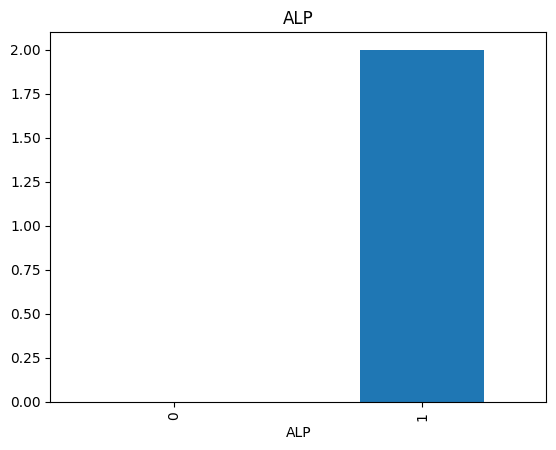

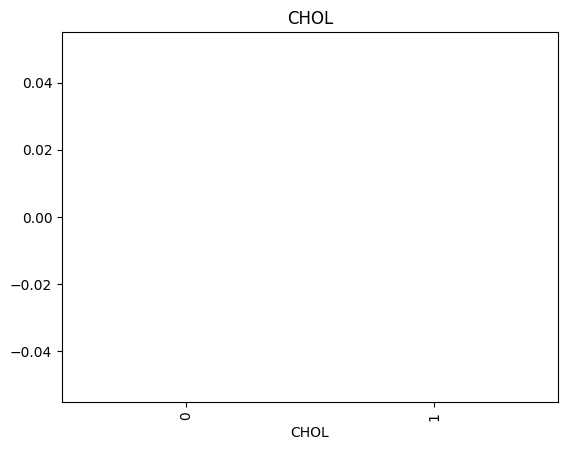

In [ ]:
for feature in features_with_na:
    dataS= data.copy()

    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    dataS[feature] = np.where(dataS[feature].isnull(), 1, 0)

    #here only 2 column have missing value. If the missing value does not impact the category feature we will drop the column
    #to determine the realtionship we showed a bar to determine the missing value relationship with the target Feature

    # let's calculate the mean Category where the information is missing or present
    dataS.groupby(feature)['Category'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [ ]:
#drop column
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('CHOL', axis=1)

In [ ]:
print(data.isnull().sum())

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CREA         0
GGT          0
PROT         1
dtype: int64


fills in any missing values (NaNs) with the mean value of that column.

In [ ]:
data['ALB'].fillna(data['ALB'].mean(), inplace=True)
data['ALP'].fillna(data['ALP'].mean(), inplace=True)
data['ALT'].fillna(data['ALT'].mean(), inplace=True)
data['PROT'].fillna(data['PROT'].mean(), inplace=True)
print(data.isnull().sum())

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CREA        0
GGT         0
PROT        0
dtype: int64


In [ ]:
# Statistics for each column
data.describe()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.299187,47.408130,0.386992,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,81.287805,39.533171,72.044137
std,0.841657,10.055105,0.487458,5.775920,25.643955,25.448940,33.090690,19.673150,2.205657,49.756166,54.661071,5.398234
min,0.000000,19.000000,0.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,8.000000,4.500000,44.800000
25%,0.000000,39.000000,0.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,67.000000,15.700000,69.300000
50%,0.000000,47.000000,0.000000,41.900000,66.700000,23.000000,25.900000,7.300000,8.260000,77.000000,23.300000,72.200000
75%,0.000000,54.000000,1.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,88.000000,40.200000,75.400000
max,4.000000,77.000000,1.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,1079.100000,650.900000,90.000000


In [ ]:
data.corr()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CREA,GGT,PROT
Category,1.000000,0.159327,-0.068305,-0.408077,0.121318,0.216090,0.613151,0.422480,-0.335330,0.158393,0.502025,-0.160193
Age,0.159327,1.000000,0.024544,-0.197005,0.168473,-0.006017,0.088666,0.032492,-0.075093,-0.022296,0.153087,-0.153665
Sex,-0.068305,0.024544,1.000000,-0.146065,0.019547,-0.161785,-0.130891,-0.111177,-0.169111,-0.159589,-0.133276,-0.051250
ALB,-0.408077,-0.197005,-0.146065,1.000000,-0.138858,0.001606,-0.193397,-0.221650,0.375848,-0.001573,-0.155555,0.550033
ALP,0.121318,0.168473,0.019547,-0.138858,1.000000,0.172461,0.062202,0.048600,0.032971,0.149554,0.442262,-0.053633
ALT,0.216090,-0.006017,-0.161785,0.001606,0.172461,1.000000,0.273325,-0.038468,0.146953,-0.043025,0.248086,0.094373
AST,0.613151,0.088666,-0.130891,-0.193397,0.062202,0.273325,1.000000,0.312231,-0.208536,-0.021387,0.491263,0.039888
BIL,0.422480,0.032492,-0.111177,-0.221650,0.048600,-0.038468,0.312231,1.000000,-0.333172,0.031224,0.217024,-0.041309
CHE,-0.335330,-0.075093,-0.169111,0.375848,0.032971,0.146953,-0.208536,-0.333172,1.000000,-0.011157,-0.110345,0.293184
CREA,0.158393,-0.022296,-0.159589,-0.001573,0.149554,-0.043025,-0.021387,0.031224,-0.011157,1.000000,0.121003,-0.031693


In [ ]:
# Value counts of categorical variables
print(data['Category'].value_counts())
print(data['Sex'].value_counts())

0.0    533
3.0     30
1.0     24
2.0     21
4.0      7
Name: Category, dtype: int64
0.0    377
1.0    238
Name: Sex, dtype: int64


# **Plotting The categorical Variable**

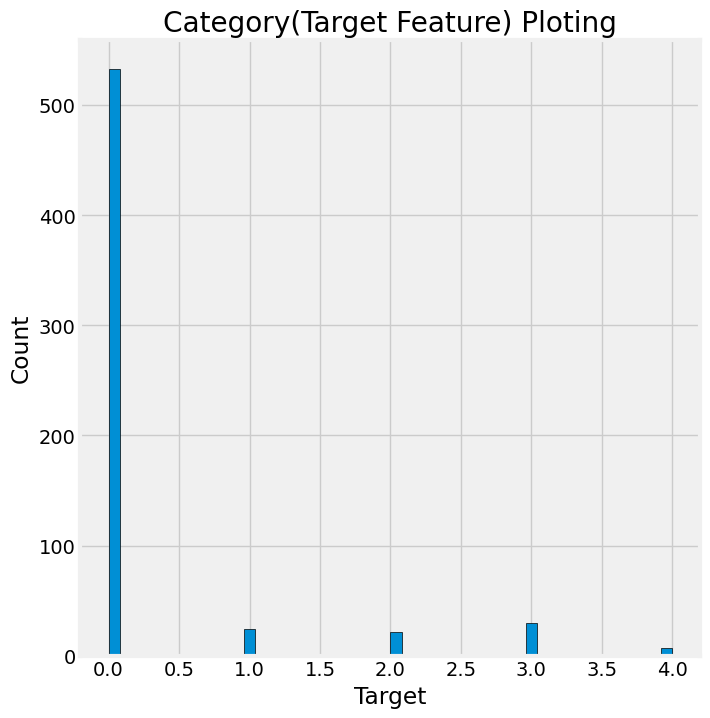

In [ ]:
plt.figure(figsize=(8, 8))


# Histogram of the Category
plt.style.use('fivethirtyeight')
plt.hist(data['Category'].dropna(), bins = 50, edgecolor = 'k');
plt.xlabel('Target'); plt.ylabel('Count');
plt.title('Category(Target Feature) Ploting');

Spilit The data

In [ ]:
X = data.drop(columns='Category', axis=1)
Y = data['Category']

In [ ]:
print(X)

      Age  Sex   ALB        ALP    ALT    AST   BIL    CHE   CREA    GGT  PROT
0    32.0  0.0  38.5   52.50000    7.7   22.1   7.5   6.93  106.0   12.1  69.0
1    32.0  0.0  38.5   70.30000   18.0   24.7   3.9  11.17   74.0   15.6  76.5
2    32.0  0.0  46.9   74.70000   36.2   52.6   6.1   8.84   86.0   33.2  79.3
3    32.0  0.0  43.2   52.00000   30.6   22.6  18.9   7.33   80.0   33.8  75.7
4    32.0  0.0  39.2   74.10000   32.6   24.8   9.6   9.15   76.0   29.9  68.7
..    ...  ...   ...        ...    ...    ...   ...    ...    ...    ...   ...
610  62.0  1.0  32.0  416.60000    5.9  110.3  50.0   5.57   55.7  650.9  68.5
611  64.0  1.0  24.0  102.80000    2.9   44.4  20.0   1.54   63.0   35.9  71.3
612  64.0  1.0  29.0   87.30000    3.5   99.0  48.0   1.66   66.7   64.2  82.0
613  46.0  1.0  33.0   68.28392   39.0   62.0  20.0   3.56   52.0   50.0  71.0
614  59.0  1.0  36.0   68.28392  100.0   80.0  12.0   9.07   67.0   34.0  68.0

[615 rows x 11 columns]


In [ ]:
print(Y)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
610    3.0
611    3.0
612    3.0
613    3.0
614    3.0
Name: Category, Length: 615, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(615, 11) (492, 11) (123, 11)


Balancing Dataset(Over-sampling)

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [ ]:
# Implementing Oversampling for Handling Imbalanced
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X_res, y_res = smk.fit_resample(X, Y)

In [ ]:
X_res.shape,y_res.shape

((2661, 11), (2661,))

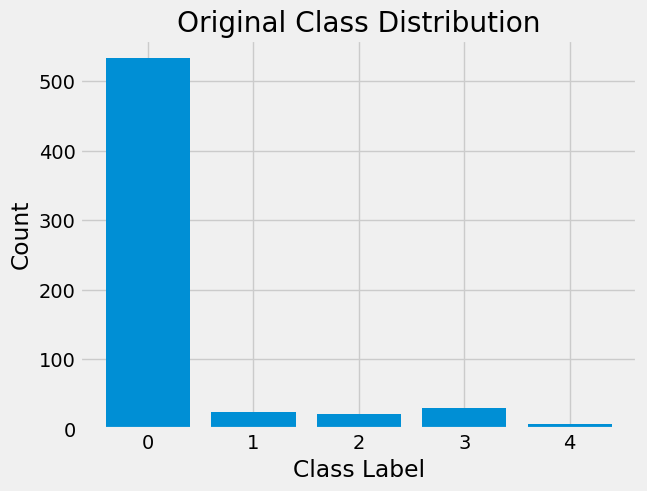

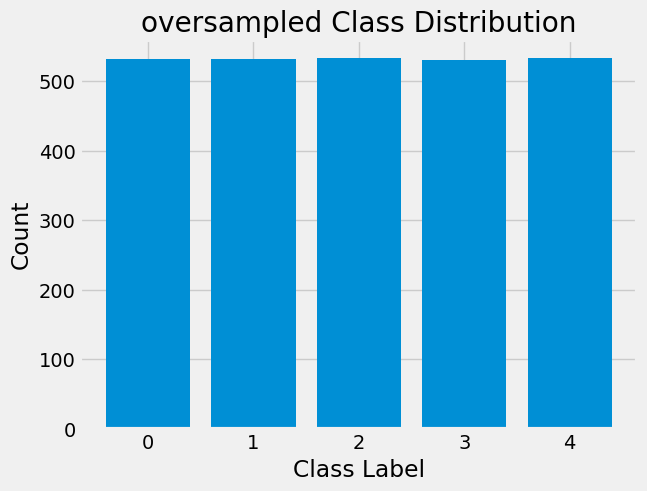

In [ ]:
def plot_class_distribution(y, title):
    unique, counts = np.unique(y, return_counts=True)
    plt.bar(unique, counts)
    plt.title(title)
    plt.xlabel('Class Label')
    plt.ylabel('Count')
    plt.show()

# Plot original distribution
plot_class_distribution(Y, 'Original Class Distribution')

# Plot undersampled distribution
plot_class_distribution(y_res, 'oversampled Class Distribution')

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0.0: 533, 3.0: 30, 1.0: 24, 2.0: 21, 4.0: 7})
Resampled dataset shape Counter({4.0: 533, 2.0: 533, 0.0: 532, 1.0: 532, 3.0: 531})


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    float64
 1   Age       615 non-null    float64
 2   Sex       615 non-null    float64
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CREA      615 non-null    float64
 10  GGT       615 non-null    float64
 11  PROT      615 non-null    float64
dtypes: float64(12)
memory usage: 57.8 KB


<Axes: >

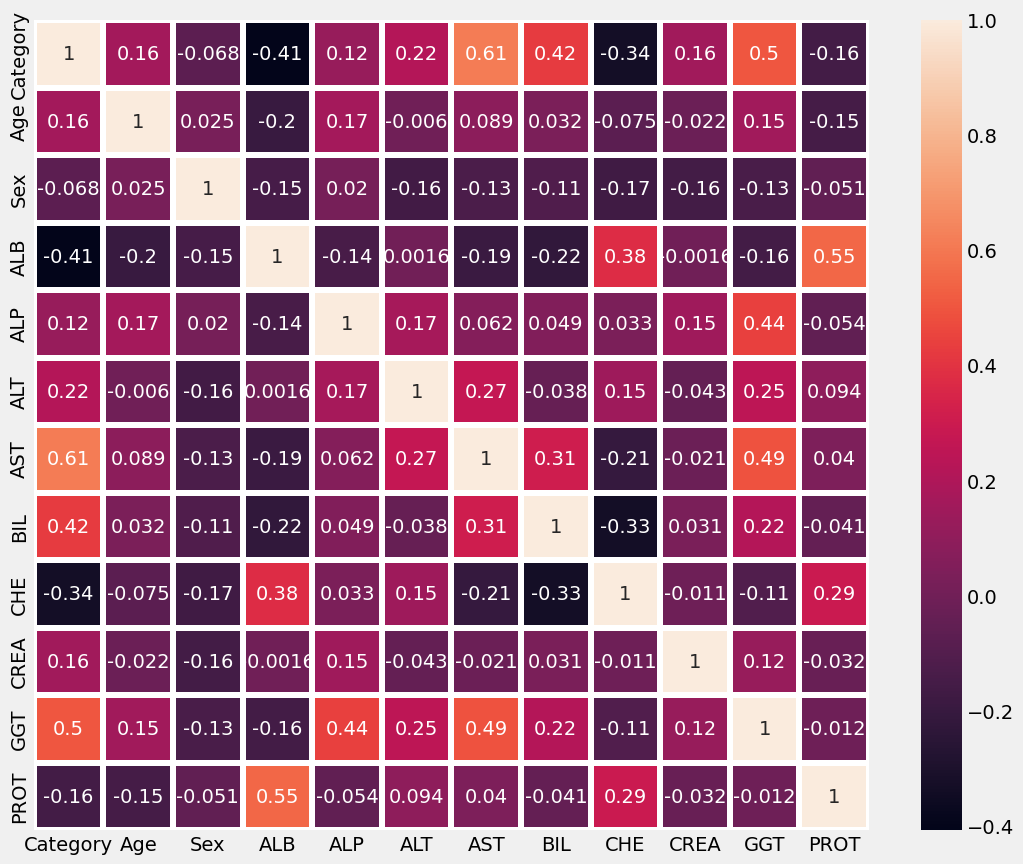

In [ ]:
data_corr = data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(data=data_corr, annot=True, linewidths=3)


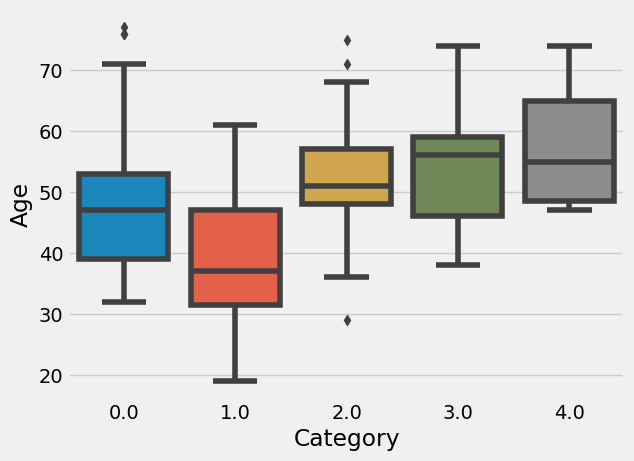

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Category", y="Age", data=data)
plt.show()

# **Model Training**

# **Logistic Regression**


In [ ]:
model = LogisticRegression()

In [ ]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9532520325203252


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8943089430894309


# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)


rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(Y_test, rf_pred))

Random Forest Accuracy: 0.9186991869918699


# **Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train, Y_train)

gbc_pred = gbc.predict(X_test)
print("Gradient Boosting Classifier Accuracy:", accuracy_score(Y_test, gbc_pred))

Gradient Boosting Classifier Accuracy: 0.9349593495934959


# **XGBoost Classifier**

In [ ]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, Y_train)

xgb_c_pred = xgb_classifier.predict(X_test)
print("XGBoost Classifier Accuracy:", accuracy_score(Y_test, xgb_c_pred))

XGBoost Classifier Accuracy: 0.926829268292683


# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)  # Using a linear kernel for this example
svm.fit(X_train, Y_train)

svm_train_pred = svm.predict(X_train)
print("SVM Training Accuracy:", accuracy_score(Y_train, svm_train_pred))

svm_test_pred = svm.predict(X_test)
print("SVM Test Accuracy:", accuracy_score(Y_test, svm_test_pred))

SVM Training Accuracy: 0.9735772357723578
SVM Test Accuracy: 0.8943089430894309


# **Stacked Model**

Stacking is a strong ensemble learning strategy in machine learning that combines the predictions of numerous base models to get a final prediction with better performance.

Here we build an ensemble model that combines predictions from the models we've already trained, essentially stacking them. We'll use a majority voting system for classification models. For the Linear Regression model (which is not ideal for this task), we'll transform its continuous output into a class prediction.

Here's an outline:

1. Train individual models (Random Forest, Gradient Boosting, XGBoost, Linear Regression).
2. Use these models to make predictions on the validation set.
3. Combine the predictions: i. For classifiers, take a majority vote. ii. Convert the continuous prediction from Linear Regression to the nearest integer class.
4. The final prediction is based on the combined outputs.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.svm import SVC


class StackedModel:  #This line declares a new class named StackedModel
    def __init__(self): #This is the constructor method,
    #which is called when you create a new instance of the class.
        self.rf = RandomForestClassifier(n_estimators=100)   #A Random Forest classifier with 100 trees.
        self.gbc = GradientBoostingClassifier(n_estimators=100) #A Gradient Boosting classifier with 100 boosting stages.
        self.xgb_classifier = xgb.XGBClassifier(n_estimators=100) #An XGBoost classifier with 100 boosting rounds.
        self.svm = SVC()
        self.model = LinearRegression() #A Linear Regression model.

    def fit(self, X_train, Y_train): #This method is used to train all the models.
    # It accepts training data X_train and labels Y_train.
        self.rf.fit(X_train, Y_train) #Inside the fit method, each model is trained on the provided data.
        self.gbc.fit(X_train, Y_train)
        self.xgb_classifier.fit(X_train, Y_train)
        self.svm.fit(X_train, Y_train)
        self.model.fit(X_train, Y_train)

    def predict(self, X): #This method is used to make predictions using all the models.
    #It accepts data X on which predictions are to be made
        # Predictions from classifiers
        #Predictions are made for each classifier: Random Forest, Gradient Boosting, and XGBoost
        rf_preds = self.rf.predict(X)
        gbc_preds = self.gbc.predict(X)
        xgb_preds = self.xgb_classifier.predict(X)
        svm_preds = self.svm.predict(X)

        # Predictions from Linear Regression, converted to nearest integer
        model_preds = np.round(self.model.predict(X)).astype(int)
        #Predictions are made using the Linear Regression model.
        #Since Linear Regression returns continuous values but we are doing classification, we round the predictions to get integer class labels

        # Clip values to ensure they lie between 0 and 4
        #This line ensures that the rounded predictions from Linear Regression lie within the range [0, 4], which are our class labels.
        np.clip(model_preds, 0, 4, out=model_preds)

        # Stacking
        #All predictions are stacked vertically into a new matrix. Each row of this matrix represents predictions from one of the models for all data points
        combined_preds = np.vstack((rf_preds, gbc_preds, xgb_preds,svm_preds, model_preds))

        # Majority Voting
        #Using the mode function, the most common prediction (majority vote) across all models is taken for each data point. This is the essence of this stacking approach: combining the "votes" of each model to make a final decision
        final_preds, _ = stats.mode(combined_preds, axis=0)
        return final_preds.ravel()
        #The final predictions are returned. The ravel() method is used to flatten the array into one dimension.

# Load your data
X = data.drop(columns=['Category'])
Y = data['Category']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Train the stacked model
stacked_model = StackedModel()
stacked_model.fit(X_train, Y_train)

# Evaluate the model
predictions = stacked_model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print(f"Stacked Model Accuracy: {accuracy:.4f}")

Stacked Model Accuracy: 0.8919


# **Accurancy Ploting in ascending order**

In [ ]:
from sklearn.metrics import accuracy_score

def compute_accuracy(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, Y_train)

    # Predict on test set
    Y_pred = model.predict(X_test)

    # Return accuracy
    return accuracy_score(Y_test, Y_pred)

In [ ]:
# Assuming you've already imported and instantiated each model as rf, gbc, xgb_classifier, etc.

models = {
    'Random Forest': rf,
    'Gradient Boosting Classifier': gbc,
    'XGBoost Classifier': xgb_classifier,
    'Support Vector Machine': svm,
    'Logistic Regression' : model,
    'Stacked Model': stacked_model,



    # ... add other models here
}

accuracies = {name: compute_accuracy(model, X_train, Y_train, X_test, Y_test) for name, model in models.items()}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


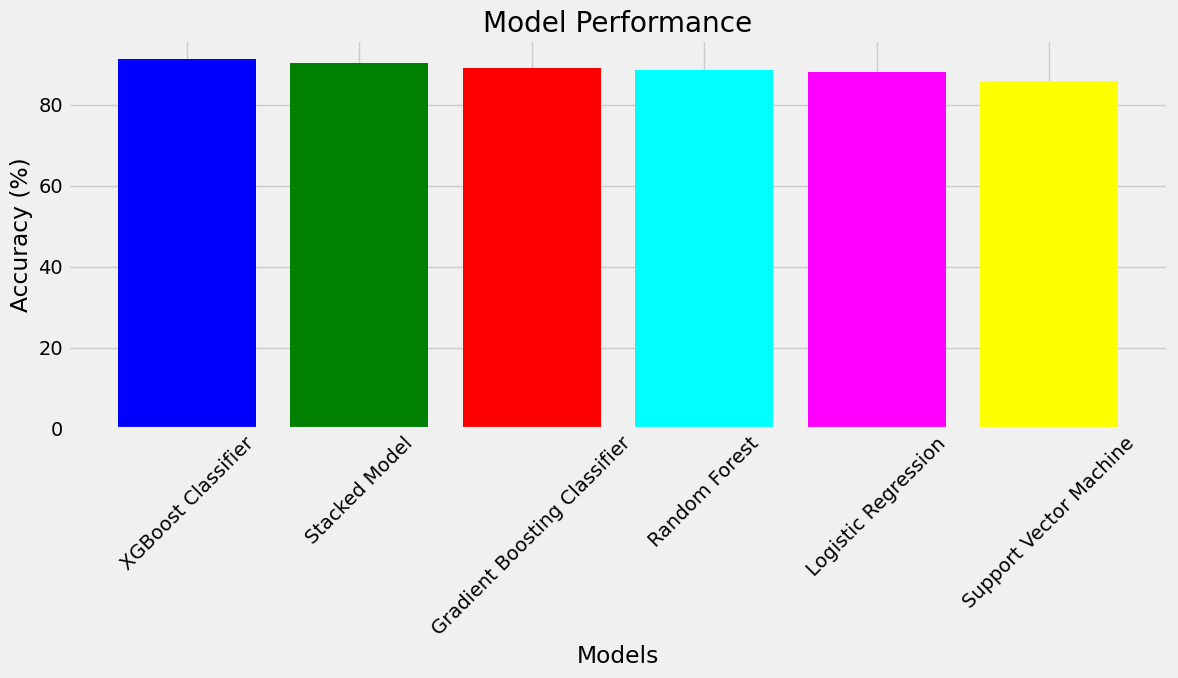

In [ ]:
import matplotlib.pyplot as plt

# Sort accuracies
sorted_accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1], reverse=True))

# Convert accuracies to percentages
for model_name, accuracy in sorted_accuracies.items():
    sorted_accuracies[model_name] = accuracy * 100

# Plot
plt.figure(figsize=(12, 7))
plt.bar(sorted_accuracies.keys(), sorted_accuracies.values(), color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black'])
plt.ylabel('Accuracy (%)')
plt.xlabel('Models')
plt.title('Model Performance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()